In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [13]:
data = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data')
data.columns = ['age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'capital-gain', 'capital-loss', 'hours-per-week', 'native-country', 'whatever']

In [59]:
data

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,whatever
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
5,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
6,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
7,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
8,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K
9,37,Private,280464,Some-college,10,Married-civ-spouse,Exec-managerial,Husband,Black,Male,0,0,80,United-States,>50K


### 1. How many males and females are there?

In [19]:
data['sex'].value_counts()

 Male      21789
 Female    10771
Name: sex, dtype: int64

### 2. What is the mean male age?

In [31]:
data[data.sex == ' Male'].age.mean()

39.433567396392675

### 3. What is the proportion of the US citizens?

In [44]:
data['native-country'].value_counts(['United-States'])[0]

0.8958538083538083

### 4. Plot the distribution of people’s education as a bar plot.

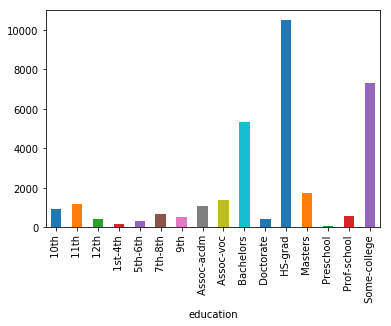

In [36]:
data.groupby('education').size().plot.bar()

### 5. What is the mean and standard deviation of the ”final weight” for divorced people?

In [51]:
data[data['marital-status'] == ' Divorced'].age.mean()

43.04163853252307

In [52]:
data[data['marital-status'] == ' Divorced'].age.std()

10.400395873473395

### 6. Is it true that the people who receive over 50k are mostly highly educated?

Я правильно понял, что education-num : чем выше- тем хаер идукейтед?

In [72]:
more_than_50K = data[data['whatever'] == ' >50K']['education-num'].mean()
less_than_50K= data[data['whatever'] == ' <=50K']['education-num'].mean()

In [73]:
if more_than_50K > less_than_50K:
    print('True')
else:
    print('False')

True


### 7. What is the maximum male and female age for each race?

In [92]:
data.groupby(['race', 'sex'])['age'].max()

race                 sex    
 Amer-Indian-Eskimo   Female    80
                      Male      82
 Asian-Pac-Islander   Female    75
                      Male      90
 Black                Female    90
                      Male      90
 Other                Female    74
                      Male      77
 White                Female    90
                      Male      90
Name: age, dtype: int64

### 8. The people from which countries work as farmers/fishers?

In [107]:
data[data['occupation'] == ' Farming-fishing'].groupby('native-country').size()

native-country
 ?                  5
 Cambodia           1
 Canada             2
 Cuba               2
 El-Salvador        2
 England            1
 France             1
 Germany            1
 Guatemala          4
 Hong               1
 Ireland            1
 Italy              2
 Japan              1
 Mexico            77
 Philippines        4
 Poland             1
 Portugal           1
 Puerto-Rico        5
 United-States    879
 Vietnam            2
 Yugoslavia         1
dtype: int64

### 9. Consider the ratio of the number of 1) male bachelors to male masters, and 2) female bachelors to female masters. Which one is higher?

In [131]:
males = data[data['sex'] == ' Male']
females = data[data['sex'] == ' Female']
m_r = len(males[males['education'] == ' Bachelors']) / len(males[males['education'] == ' Masters'])
f_r = len(females[females['education'] == ' Bachelors']) / len(females[females['education'] == ' Masters'])
print('1) {}, 2) {}'.format(m_r, f_r))

if m_r > f_r:
    print('First one is higher')
elif m_r == f_r:
    print('Equally')
else:
    print('Second one is higher')

1) 3.146588037068239, 2) 3.0205223880597014
First one is higher


### 10. What is the largest number of hours a person works a week?

In [106]:
data['hours-per-week'].max()

99